In [7]:

"""
Requirement 2:
Spot the trend relationship by visualizing the stats of few stocks. There are four methods
1. regular_std
2. regular_mm
3. two_mean_list by look_max
4. two_mean_list by look_min
"""

from abupy import ABuSymbolPd
import matplotlib.pyplot as plt

amex_df = ABuSymbolPd.make_kl_df('usAXP',
                                 n_folds=2)
print('Amex: mean {}, median {}'.format(
    round(amex_df.close.mean(),2),
    round(amex_df.close.median(),2)
))
amex_df.tail()

Amex: mean 96.7, median 98.25


,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2018-12-24,89.50,91.55,89.50,-2.004,90.74,91.33,3190855,20181224,0,392,4.4431,4.8634
2018-12-26,93.84,93.89,89.05,4.849,89.85,89.50,5383666,20181226,2,393,4.4792,4.8603
2018-12-27,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181227,3,394,4.5120,4.8576
2018-12-28,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181228,4,395,4.5418,4.8552
2018-12-31,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181231,0,396,4.5689,4.8532


In [8]:

mc_df = ABuSymbolPd.make_kl_df('usMA',
                                 n_folds=2)
print('MasterCard: mean {}, median {}'.format(
    round(mc_df.close.mean(),2),
    round(mc_df.close.median(),2)
))
mc_df.tail()

MasterCard: mean 171.99, median 175.16


,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2018-12-24,174.65,177.98,171.89,-0.308,173.15,175.19,4351915,20181224,0,392,9.0716,9.3403
2018-12-26,186.43,186.50,176.00,6.745,176.00,174.65,5261366,20181226,2,393,9.2751,9.6029
2018-12-27,186.43,186.50,176.00,0.000,176.00,186.43,5261366,20181227,3,394,9.5092,9.9026
2018-12-28,186.43,186.50,176.00,0.000,176.00,186.43,5261366,20181228,4,395,9.5993,9.9822
2018-12-31,186.43,186.50,176.00,0.000,176.00,186.43,5261366,20181231,0,396,9.6812,10.0513


Text(0.5, 0, 'close')

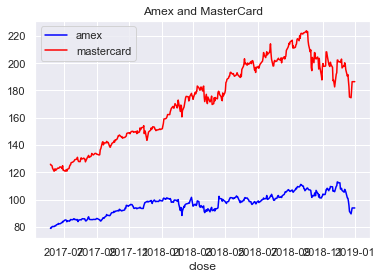

In [11]:
def plot_two_stocks(amex, mastercard, asx=None):
    # If asx is passed in, otherwise use plt
    drawer = plt if asx is None else asx
    drawer.plot(amex, c='b')
    drawer.plot(mastercard, c='r')
    drawer.grid(True)
    drawer.legend(['amex',
                   'mastercard'],
                  loc='best')

plot_two_stocks(amex_df.close, 
                mc_df.close)
plt.title('Amex and MasterCard')
plt.xlabel('time')
plt.xlabel('close')

Text(0.5, 1.0, '(group - group.mean()) / group.std()')

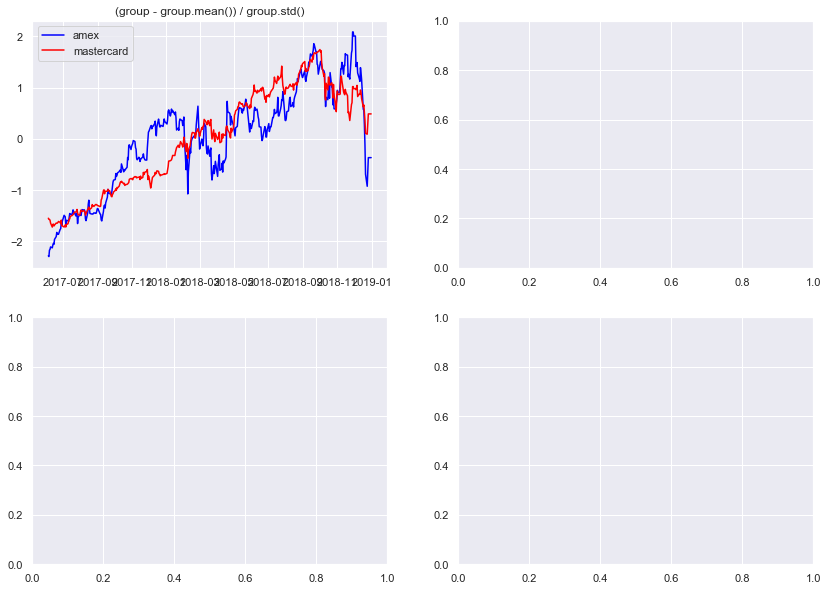

In [17]:
def two_mean_list(one, two, type_look='look_max'):
    """
    Standardize two inputs
    :param one: 
    :param two: 
    :param type_look: 
    :return: 
    """
    one_mean = one.mean()
    two_mean = two.mean()
    if type_look == 'look_max':
        one, two = (one, one_mean / two_mean * two) if one_mean > two_mean else (one * two_mean / one_mean, two)
    elif type_look == 'look_min':
        one, two = (one * two_mean / one_mean, two) if one_mean > two_mean else (one, two * one_mean / two_mean)
    
    return one, two

def regular_std(group):
    # z-score
    return (group - group.mean()) / group.std()

def regular_mm(group):
    return (group - group.min()) / (group.max() - group.min())


Text(0.5, 1.0, 'two_mean_list type_look=look_min')

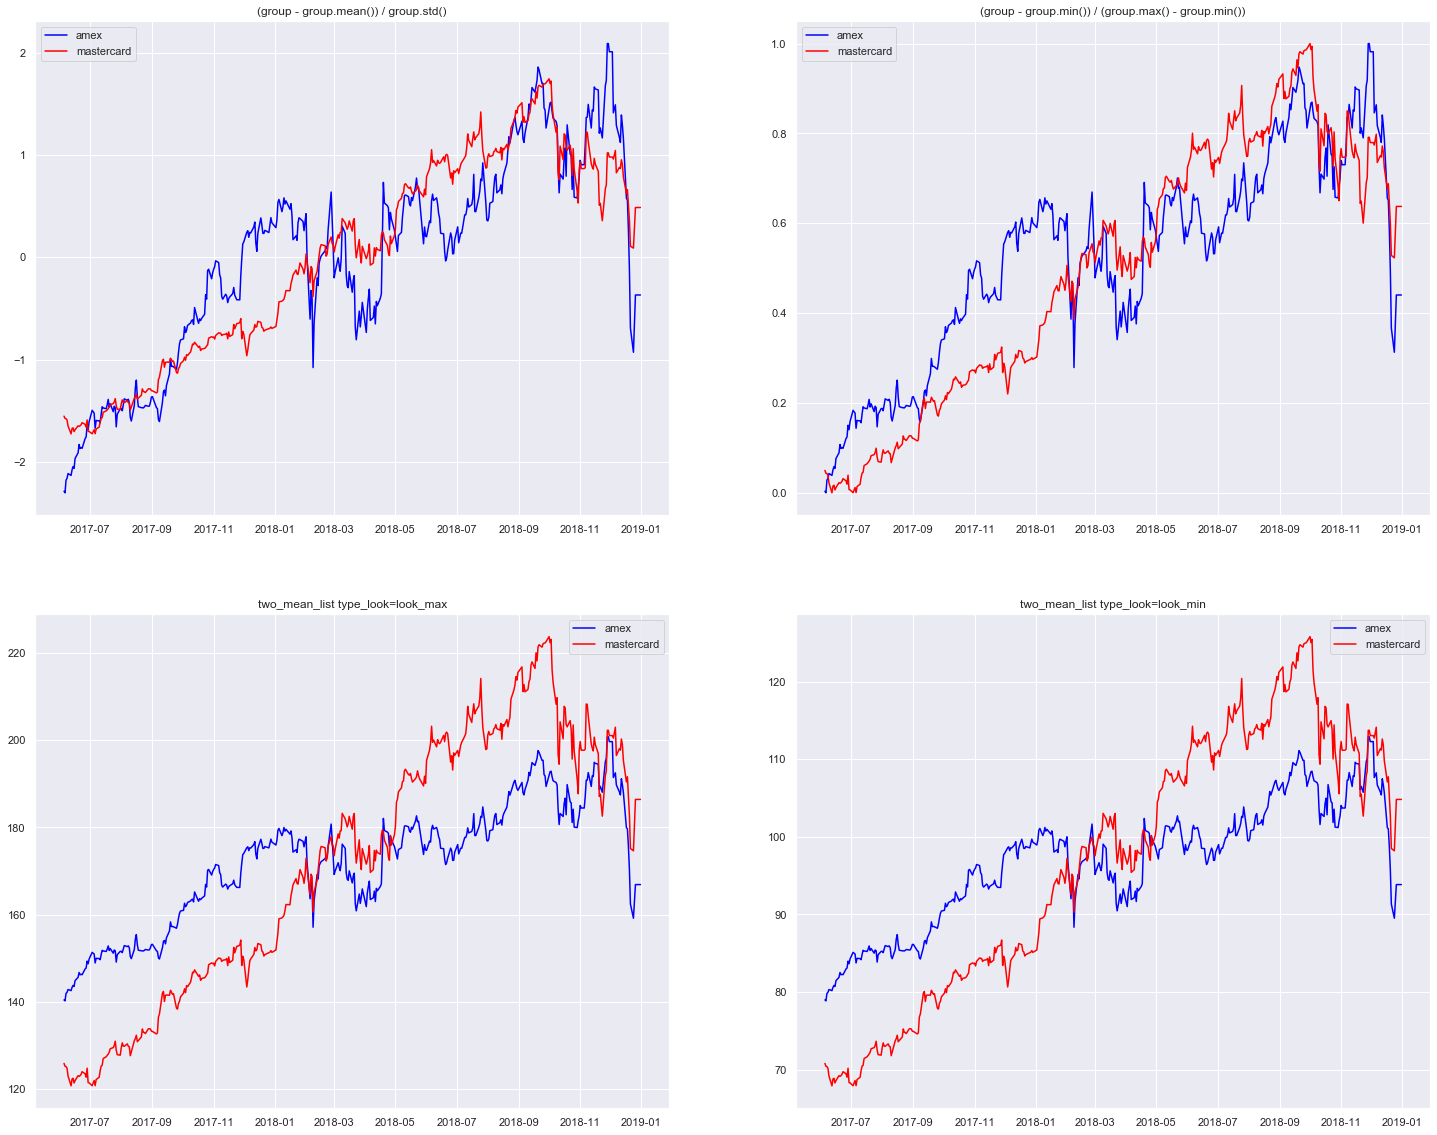

In [20]:
_, axs = plt.subplots(nrows=2,                    
                      ncols=2,
                      figsize=(25, 20))
drawer = axs[0][0]
plot_two_stocks(regular_std(amex_df.close), 
                regular_std(mc_df.close),
                drawer)
drawer.set_title('(group - group.mean()) / group.std()')

drawer = axs[0][1]
plot_two_stocks(regular_mm(amex_df.close), 
                regular_mm(mc_df.close),
                drawer)
drawer.set_title('(group - group.min()) / (group.max() - group.min())')

drawer = axs[1][0]
one, two = two_mean_list(amex_df.close,
                         mc_df.close,
                         type_look='look_max')
plot_two_stocks(one,
                two,
                drawer)
drawer.set_title('two_mean_list type_look=look_max')

drawer = axs[1][1]
one, two = two_mean_list(amex_df.close,
                         mc_df.close,
                         type_look='look_min')
plot_two_stocks(one,
                two,
                drawer)
drawer.set_title('two_mean_list type_look=look_min')

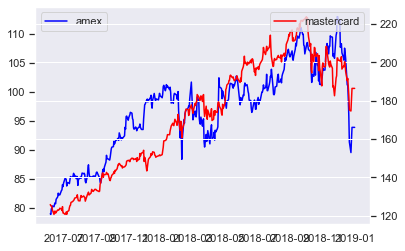

In [21]:
_, ax1 = plt.subplots()
ax1.plot(amex_df.close,
         c='b',
         label='amex')
ax1.legend(loc=2)
ax1.grid(False)
# Use Twinx
ax2 = ax1.twinx()
ax2.plot(mc_df.close,
         c='r',
         label='mastercard')
ax2.legend(loc=1)
